Il faudrait présenter les deux premières cellules en ordre inversé, montrer le succès d'abord mais les problèmes rencontrés, qui justifient l'implémentationn de la suite

Première implémentation descente par gradient.
Le minimum global n'est pas atteint, on est coincé dans un minimum local

In [3]:
from mayavi import mlab
import numpy as np

def f(x, y):
    return ((x**2)+(y**2))/30+ np.sin(np.log(1+abs(x*y)))
def gradf(x,y):
    return((x/15)+((x*abs(y)/abs(x))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))),(y/15)+((abs(x)*y/abs(y))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))))

a, b = -10, -10
coos = [(a,b)]
lr = 0.4
for i in range(200):
    g = gradf(a,b)
    a, b  = a - lr*g[0], b - lr*g[1]
    coos.append((a,b))

#Aspect visu
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


coordinates = [(e[0], e[1], f(e[0], e[1])) for e in coos]
print(coordinates)
mlab.figure(size=(800, 600), bgcolor=(0.05, 0.05, 0.1))

# Plot the plane
mlab.mesh(X, Y, Z, colormap='CMRmap')

cross_1 = np.array([-0.25, 0.25])
cross_2 = np.array([0, 0])
cross_z = np.array([f(0, 0), f(0,0)])

mlab.plot3d(cross_1, cross_2, cross_z, color=(1, 1, 1), tube_radius=0.1)
mlab.plot3d(cross_2, cross_1, cross_z, color=(1, 1, 1), tube_radius=0.1)

ball = mlab.points3d(coordinates[0][0], coordinates[0][1], coordinates[0][2], scale_factor=0.5, color=(0.1, 0.2, 0.5))

def update_ball():
    i = 0
    while i < len(coordinates):
        coord = coordinates[i]
        ball.mlab_source.set(x=coord[0], y=coord[1], z=coord[2])
        i +=1
        yield

anim = update_ball()
mlab.show(stop=True)

while True:
    try:
        next(anim)
    except StopIteration:
        break
    mlab.process_ui_events()

mlab.show()

[(-10, -10, 5.67139351511631), (-9.73717947818212, -9.73717947818212, 5.332072321259536), (-9.483595917787802, -9.483595917787802, 5.016279875956743), (-9.23907748251342, -9.23907748251342, 4.722752779896958), (-9.003449134567305, -9.003449134567305, 4.450266604323549), (-8.776532180574762, -8.776532180574762, 4.197635181553856), (-8.558143915303505, -8.558143915303505, 3.963710234689745), (-8.34809737059431, -8.34809737059431, 3.7473812979623005), (-8.146201174691832, -8.146201174691832, 3.5475758741547203), (-7.95225952469238, -7.95225952469238, 3.3632597720610815), (-7.766072272152856, -7.766072272152856, 3.1934375652137894), (-7.5874351191476705, -7.5874351191476705, 3.0371531132976695), (-7.416139919337055, -7.416139919337055, 2.893490089798856), (-7.251975076041193, -7.251975076041193, 2.761572463427492), (-7.094726027013614, -7.094726027013614, 2.640564886507323), (-6.944175803673674, -6.944175803673674, 2.529672950547087), (-6.800105651069934, -6.800105651069934, 2.428143277228

Current object is not active, please select an active object.
Current object is not active, please select an active object.


En augmentant la pente de la fonction, elle est minimisée en très peu d'itérations

In [4]:
from mayavi import mlab
import numpy as np
import time as t

def f(x, y):
    return ((x**2)+(y**2))/10+ np.sin(np.log(1+abs(x*y)))
def gradf(x,y):
    return((x/5)+((x*abs(y)/abs(x))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))),(y/5)+((abs(x)*y/abs(y))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))))

a, b = -10, -10
coos = [(a,b)]
lr = 0.1

#Descente par gradient 
for i in range(200):
    g = gradf(a,b)
    a, b  = a - lr*g[0], b - lr*g[1]
    coos.append((a,b))

#Visu
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Define the coordinates for the ball to move through
coordinates = [(e[0], e[1], f(e[0], e[1])) for e in coos]
print(coordinates)
# Create a figure with a dark background
mlab.figure(size=(800, 600), bgcolor=(0.05, 0.05, 0.1))

# Plot the plane
mlab.mesh(X, Y, Z, colormap='CMRmap')

cross_1 = np.array([-0.25, 0.25])
cross_2 = np.array([0, 0])
cross_z = np.array([f(0, 0), f(0,0)])

mlab.plot3d(cross_1, cross_2, cross_z, color=(1, 1, 1), tube_radius=0.1)
mlab.plot3d(cross_2, cross_1, cross_z, color=(1, 1, 1), tube_radius=0.1)

# Initialize the ball at the first coordinate
ball = mlab.points3d(coordinates[0][0], coordinates[0][1], coordinates[0][2], scale_factor=0.5, color=(0.1, 0.2, 0.5))

# Animation function
def update_ball():
    i = 0
    while i < len(coordinates):
        coord = coordinates[i]
        ball.mlab_source.set(x=coord[0], y=coord[1], z=coord[2])
        i += 1
        yield

anim = update_ball()
mlab.show(stop=True)

# This block is necessary to keep updating the ball position
while True:
    try:
        next(anim)
    except StopIteration:
        break
    mlab.process_ui_events()

mlab.show()

[(-10, -10, 19.004726848449643), (-9.800961536212197, -9.800961536212197, 18.22114900742199), (-9.606322117603238, -9.606322117603238, 17.471867746009824), (-9.416006604566942, -9.416006604566942, 16.75554882158617), (-9.229940857031828, -9.229940857031828, 16.07090395686825), (-9.048051668875623, -9.048051668875623, 15.416689042382137), (-8.870266704469866, -8.870266704469866, 14.791702436440556), (-8.696514437586028, -8.696514437586028, 14.194783358960237), (-8.526724092893787, -8.526724092893787, 13.624810375387389), (-8.360825590278635, -8.360825590278635, 13.080699966934407), (-8.198749492199532, -8.198749492199532, 12.561405183260561), (-8.040426954297853, -8.040426954297853, 12.065914373657264), (-7.885789679456327, -7.885789679456327, 11.59324999272786), (-7.7347698754909615, -7.7347698754909615, 11.142467476486548), (-7.587300216640278, -7.587300216640278, 10.712654184743974), (-7.4433138089944695, -7.4433138089944695, 10.30292840560199), (-7.302744159982731, -7.30274415998273

Introducing momentum, RMSProp, Adam

Permet de résoudre le problème précédent, différentes vitesse de convergence, peut être pas la nécessité d'introduire RMSProp ET Adam

In [ ]:
from mayavi import mlab
import numpy as np
import time as t
import math as m

#forte pente
def f1(x, y):
    return ((x**2)+(y**2))/10+ np.sin(np.log(1+abs(x*y)))
def gradf1(x,y):
    return((x/5)+((x*abs(y)/abs(x))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))),(y/5)+((abs(x)*y/abs(y))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))))

#pente faible, sans momentum, soucis
def f2(x, y):
    return ((x**2)+(y**2))/30+ np.sin(np.log(1+abs(x*y)))
def gradf2(x,y):
    return((x/15)+((x*abs(y)/abs(x))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))),(y/15)+((abs(x)*y/abs(y))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))))

def microvagues2(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) + np.cos(x) * np.sin(y) + (x**2)/10 + (y/12)**4
def gradmicro2(x, y):
    return (np.cos(np.sqrt(x**2+y**2))*(x/np.sqrt(x**2+y**2))-(np.sin(y)*np.sin(x))+x/5,np.cos(np.sqrt(x**2+y**2))*(y/np.sqrt(x**2+y**2))+(np.cos(y)*np.cos(x))+4*(y**3)/(12**4))

def f(x,y):
    return f1(x,y)
def gradf(x,y):
    return gradf1(x,y)

start = (-10, -10)
a, b = start[0], start[1]
coos1 = [(a,b)]
coos2 = [(a,b)]
coos3 = [(a,b)]
coos4 = [(a,b)]
lr = 0.01
nb_iter = 500

#Gradient descent with momentum
v = (0,0)
rho = 0.9
for i in range(nb_iter):
    g = gradf(a,b)
    v = (rho*v[0] - lr*g[0], rho*v[1] - lr*g[1])
    a, b  = a + v[0], b + v[1]
    coos1.append((a,b))


a, b = start[0], start[1]
#Comparaison with classic gradient descent 
for i in range(nb_iter):
    g = gradf(a,b)
    a, b  = a - lr*g[0], b - lr*g[1]
    coos2.append((a,b))

a, b = start[0], start[1] 
v =(0,0)
eps = 10**(-8)
beta = 0.5
#RSMProp
for i in range(nb_iter):
    g = gradf(a,b)
    v = (beta*v[0]+(1-beta)*g[0]**2, beta*v[1]+ (1-beta)*g[1]**2)
    a, b  = a - lr*g[0]*(1/(eps+np.sqrt(v[0]))), b - lr*g[1]*(1/(eps+np.sqrt(v[1])))
    coos3.append((a,b))

#Adam
a, b = start[0], start[1] 
v, v_ =(0,0), (0,0)
m1, m2 = (0,0), (0,0)
eps = 10**(-8)
b1, b2 = 0.9, 0.999
for i in range(nb_iter):

    g = gradf(a,b)
    m1 = (b1*m1[0] +(1-b1)*g[0], b1*m1[1] +(1-b1)*g[1])
    m2 = (m1[0]/(1-b1**(i+1)), m1[1]/(1-b1**(i+1)))
    v = (b2*v[0]+(1-b2)*(g[0]**2), b2*v[1]+ (1-b2)*(g[1]**2))
    v2 = (v[0]/(1-b2**(i+1)), v[1]/(1-b2**(i+1)))
    a, b  = a - lr*g[0]*(1/(eps+np.sqrt(v2[0]))), b - lr*g[1]*(1/(eps+np.sqrt(v2[1])))
    coos4.append((a,b))

# Generate data points for the plane
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Define the coordinates for the ball to move through
coordinates1 = [(e[0], e[1], f(e[0], e[1])) for e in coos1]
coordinates2 = [(e[0], e[1], f(e[0], e[1])) for e in coos2]
coordinates3 = [(e[0], e[1], f(e[0], e[1])) for e in coos3]
coordinates4 = [(e[0], e[1], f(e[0], e[1])) for e in coos4]
print(coordinates1)
print(coordinates2)
print(coordinates3)
print(coordinates4)
# Create a figure with a dark background
mlab.figure(size=(800, 600), bgcolor=(0.05, 0.05, 0.1))

# Plot the plane
mlab.mesh(X, Y, Z, colormap='CMRmap')

#Cross
"""cross_1 = np.array([-0.25, 0.25])
cross_2 = np.array([0, 0])
cross_z = np.array([f(0, 0), f(0,0)])

mlab.plot3d(cross_1, cross_2, cross_z, color=(1, 1, 1), tube_radius=0.1)
mlab.plot3d(cross_2, cross_1, cross_z, color=(1, 1, 1), tube_radius=0.1)"""

# Initialize the ball at the first coordinate
ball1 = mlab.points3d(coordinates1[0][0], coordinates1[0][1], coordinates1[0][2], scale_factor=0.5, color=(0.1, 0.6, 1))
ball2 = mlab.points3d(coordinates2[0][0], coordinates2[0][1], coordinates2[0][2], scale_factor=0.5, color=(1, 0.6, 0.1))
ball3 = mlab.points3d(coordinates3[0][0], coordinates3[0][1], coordinates3[0][2], scale_factor=0.5, color=(0.3, 0.6, 0.3))
ball4 = mlab.points3d(coordinates3[0][0], coordinates3[0][1], coordinates3[0][2], scale_factor=0.5, color=(0.2, 0.2, 0.2))
# Animation function
def update_ball():
    i = 0
    while i < len(coordinates1):
        coord1 = coordinates1[i]
        ball1.mlab_source.set(x=coord1[0], y=coord1[1], z=coord1[2])
        coord2 = coordinates2[i]
        ball2.mlab_source.set(x=coord2[0], y=coord2[1], z=coord2[2])
        coord3 = coordinates3[i]
        ball3.mlab_source.set(x=coord3[0], y=coord3[1], z=coord3[2])
        coord4 = coordinates4[i]
        ball4.mlab_source.set(x=coord4[0], y=coord4[1], z=coord4[2])
        i += 1
        t.sleep(0.02)
        yield

anim = update_ball()
mlab.show(stop=True)

# Add labels
mlab.text(0.1, 0.85, 'SGD with Momentum', width=0.3, color=(0.1, 0.6, 1))
mlab.text(0.1, 0.77, 'Classic SGD', width=0.2, color=(1, 0.6, 0.1))
mlab.text(0.1, 0.71, 'RMSProp', width=0.15, color=(0.3, 0.6, 0.3))
mlab.text(0.1, 0.64, 'Adam', width=0.15, color=(0.2, 0.2, 0.2))

# This block is necessary to keep updating the ball position
while True:
    try:
        next(anim)
    except StopIteration:
        break
    mlab.process_ui_events()


# Show the plot
mlab.show()

Interface plus propre, on procède par étape

Générer les data puis les visualiser plus tard | Stockage de fonctions de loss

In [ ]:
#Stocker des fonctions ici
#forte pente (valley)
def f1(x, y):
    return ((x**2)+(y**2))/10+ np.sin(np.log(1+abs(x*y)))
def gradf1(x,y):
    return((x/5)+((x*abs(y)/abs(x))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))),(y/5)+((abs(x)*y/abs(y))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))))

#pente faible (valley), sans momentum, soucis
def f2(x, y):
    return ((x**2)+(y**2))/30+ np.sin(np.log(1+abs(x*y)))
def gradf2(x,y):
    return((x/15)+((x*abs(y)/abs(x))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))),(y/15)+((abs(x)*y/abs(y))/(1+abs(x*y)))*np.cos(np.log(1+abs(x*y))))

def smooth2(x, y):
    return (x**2)/40+ 4*np.sin((y**2)/70)

def microvagues(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) + np.cos(x) * np.sin(y) + (x**2)/10
def gradmicro(x, y):
    return (np.cos(np.sqrt(x**2+y**2))*(x/np.sqrt(x**2+y**2))-(np.sin(y)*np.sin(x))+x/5,np.cos(np.sqrt(x**2+y**2))*(y/np.sqrt(x**2+y**2))+(np.cos(y)*np.cos(x)))

def microvagues2(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) + np.cos(x) * np.sin(y) + (x**2)/10 + (y/12)**4
def gradmicro2(x, y):
    return (np.cos(np.sqrt(x**2+y**2))*(x/np.sqrt(x**2+y**2))-(np.sin(y)*np.sin(x))+x/5,np.cos(np.sqrt(x**2+y**2))*(y/np.sqrt(x**2+y**2))+(np.cos(y)*np.cos(x))+4*(y**3)/(12**4))

Choix fonction et settings, différentes config sont donc stockées à la suite

In [ ]:
def f(x,y):
    return f1(x,y)
def gradf(x,y):
    return f1(x,y)
lr = 0.1

In [ ]:
def f(x,y):
    return f2(x,y)
def gradf(x,y):
    return f2(x,y)
a,b = -10, -10

In [ ]:
def f(x,y):
    return microvagues2(x,y)
def gradf(x,y):
    return gradmicro2(x,y)
a,b = -9, -5

Fonction de perte typique en cas de régression : MSE, Mean Squared Error, Polynomiale degré 2

In [22]:
c1, c2, c3, c4, c5  = 0.05, 0.02, -1, -0.3, 8
def lossP2(x, y):
    return c1*x**2 + c2*y**2 + c3*x + c4*y + c5
def gradP2(x,y):
    return (2*c1*x+ c3, 2*c2*y + c4)

Visualisation de la fonction de perte

In [23]:
from mayavi import mlab
import numpy as np
import time as t
import math as m
x = np.linspace(-20, 20, 200)
y = np.linspace(-20, 20, 200)
X1, Y1 = np.meshgrid(x, y)
Z1 = lossP2(X1, Y1)
mlab.figure(size=(800, 600), bgcolor=(0.05, 0.05, 0.1))
mlab.mesh(X1, Y1, Z1, colormap='CMRmap')
mlab.show()

Fonction de perte complexe, assimilable aux résultats que pourrait donner un neural network dans un problème réel, car les NNs sont sensibles à de faibles variations de leurs paramètres

In [54]:
def loss(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) + np.cos(x) * np.sin(y) + (x**2)/10 + (y/12)**4 - (y**3)/500 + ((y-3)**4)/10000
def grad(x,y):
    return (np.cos(np.sqrt(x**2+y**2))*(x/np.sqrt(x**2+y**2))-(np.sin(y)*np.sin(x))+x/5,np.cos(np.sqrt(x**2+y**2))*(y/np.sqrt(x**2+y**2))+(np.cos(y)*np.cos(x))+4*(y**3)/(12**4) - (y**2)*3/500 +((y-3)**3)/2500)

In [49]:
from mayavi import mlab
import numpy as np
import time as t
import math as m
x = np.linspace(-19, 19, 200)
y = np.linspace(-18, 26, 200)
X1, Y1 = np.meshgrid(x, y)
Z1 = loss(X1, Y1)
mlab.figure(size=(800, 600), bgcolor=(0.4, 0.4, 0.6))
mlab.mesh(X1, Y1, Z1, colormap='CMRmap')
mlab.show()

Essai des différents optimizers

In [90]:
start = (-18, -17)
a, b = start[0], start[1]
coos1 = [(a,b)]
coos2 = [(a,b)]
coos3 = [(a,b)]
coos4 = [(a,b)]
lr = 0.01
nb_iter = 200

#Gradient descent with momentum
v = (0,0)
rho = 0.9
for i in range(nb_iter):
    g = grad(a,b)
    v = (rho*v[0] - lr*g[0], rho*v[1] - lr*g[1])
    a, b  = a + v[0], b + v[1]
    coos1.append((a,b))


a, b = start[0], start[1]
#Comparaison with classic gradient descent 
for i in range(nb_iter):
    g = grad(a,b)
    a, b  = a - lr*g[0], b - lr*g[1]
    coos2.append((a,b))

a, b = start[0], start[1] 
v =(0,0)
eps = 10**(-8)
beta = 0.5
#RSMProp
for i in range(nb_iter):
    g = grad(a,b)
    v = (beta*v[0]+(1-beta)*g[0]**2, beta*v[1]+ (1-beta)*g[1]**2)
    a, b  = a - lr*g[0]*(1/(eps+np.sqrt(v[0]))), b - lr*g[1]*(1/(eps+np.sqrt(v[1])))
    coos3.append((a,b))

#Adam
a, b = start[0], start[1] 
v, v2 =(0,0), (0,0)
m1, m2 = (0,0), (0,0)
eps = 10**(-8)
b1, b2 = 0.9, 0.999
for i in range(nb_iter):

    g = grad(a,b)
    m1 = (b1*m1[0] +(1-b1)*g[0], b1*m1[1] +(1-b1)*g[1])
    m2 = (m1[0]/(1-b1**(i+1)), m1[1]/(1-b1**(i+1)))
    v = (b2*v[0]+(1-b2)*(g[0]**2), b2*v[1]+ (1-b2)*(g[1]**2))
    v2 = (v[0]/(1-b2**(i+1)), v[1]/(1-b2**(i+1)))
    a, b  = a - lr*g[0]*(1/(eps+np.sqrt(v2[0]))), b - lr*g[1]*(1/(eps+np.sqrt(v2[1])))
    coos4.append((a,b))

Visu

In [91]:
from mayavi import mlab
import numpy as np
import time as t
import math as m
x = np.linspace(-19, 19, 200)
y = np.linspace(-18, 26, 200)
X1, Y1 = np.meshgrid(x, y)
Z1 = loss(X1, Y1)
mlab.figure(size=(800, 600), bgcolor=(0.4, 0.4, 0.6))
mlab.mesh(X1, Y1, Z1, colormap='CMRmap')


coordinates1 = [(e[0], e[1], loss(e[0], e[1])) for e in coos1]
coordinates2 = [(e[0], e[1], loss(e[0], e[1])) for e in coos2]
coordinates3 = [(e[0], e[1], loss(e[0], e[1])) for e in coos3]
coordinates4 = [(e[0], e[1], loss(e[0], e[1])) for e in coos4]

# Initialize the ball at the first coordinate
ball1 = mlab.points3d(coordinates1[0][0], coordinates1[0][1], coordinates1[0][2], scale_factor=0.5, color=(0.1, 0.6, 1))
ball2 = mlab.points3d(coordinates2[0][0], coordinates2[0][1], coordinates2[0][2], scale_factor=0.5, color=(1, 0.6, 0.1))
ball3 = mlab.points3d(coordinates3[0][0], coordinates3[0][1], coordinates3[0][2], scale_factor=0.5, color=(0.3, 0.6, 0.3))
ball4 = mlab.points3d(coordinates3[0][0], coordinates3[0][1], coordinates3[0][2], scale_factor=0.5, color=(0.2, 0.2, 0.2))

# Animation function
def update_ball():
    i = 0
    while i < len(coordinates1):
        coord1 = coordinates1[i]
        ball1.mlab_source.set(x=coord1[0], y=coord1[1], z=coord1[2])
        coord2 = coordinates2[i]
        ball2.mlab_source.set(x=coord2[0], y=coord2[1], z=coord2[2])
        coord3 = coordinates3[i]
        ball3.mlab_source.set(x=coord3[0], y=coord3[1], z=coord3[2])
        coord4 = coordinates4[i]
        ball4.mlab_source.set(x=coord4[0], y=coord4[1], z=coord4[2])
        i += 1
        t.sleep(0.01)
        yield

anim = update_ball()
mlab.show(stop=True)

while True:
    try:
        next(anim)
    except StopIteration:
        break
    mlab.process_ui_events()


# Add labels
mlab.text(0.1, 0.85, 'SGD with Momentum', width=0.3, color=(0.1, 0.6, 1))
mlab.text(0.1, 0.77, 'Classic SGD', width=0.2, color=(1, 0.6, 0.1))
mlab.text(0.1, 0.71, 'RMSProp', width=0.15, color=(0.3, 0.6, 0.3))
mlab.text(0.1, 0.64, 'Adam', width=0.15, color=(0.2, 0.2, 0.2))
mlab.show()

In [83]:
print(coordinates1[199])
print(coordinates4[199])

(-2.440033869678509, -4.190848091518128, -0.6280747154779265)
(-16.362032786157584, -15.358698809747294, 47.89729398861083)


Adam avec les hyperparameters par défaut est lent à converger dans ce cas, commme RMSProp et le SGD, en revanche le SGD with momentum va plus loin dans sa recherche. Tentative de tuning des paramètres pour donner plus de chances aux autres optimizers | Seulement Adam de tuned ici

In [85]:
#Adam
import random as r
res = []
nb_iter = 200
start = (-18,-17)
for t in range(1000):
    lr = (r.random())**4
    eps = 10**(-8)
    b1, b2 = 1 - (r.random())**4, 1 - (r.random())**6

    a, b = start[0], start[1]
    v, v2 =(0,0), (0,0)
    m1, m2 = (0,0), (0,0)
    for i in range(nb_iter):

        g = grad(a,b)
        m1 = (b1*m1[0] +(1-b1)*g[0], b1*m1[1] +(1-b1)*g[1])
        m2 = (m1[0]/(1-b1**(i+1)), m1[1]/(1-b1**(i+1)))
        v = (b2*v[0]+(1-b2)*(g[0]**2), b2*v[1]+ (1-b2)*(g[1]**2))
        v2 = (v[0]/(1-b2**(i+1)), v[1]/(1-b2**(i+1)))
        a, b  = a - lr*g[0]*(1/(eps+np.sqrt(v2[0]))), b - lr*g[1]*(1/(eps+np.sqrt(v2[1])))
    res.append([(a,b, loss(a,b)), (lr, b1, b2)])
print(res)
min_l = 100
min_param = []
for a in res:
    if a[0][2] < min_l:
        min_l = a[0][2]
        min_param = a
print(min_param)

C:\Users\paulm\AppData\Local\Temp\ipykernel_5920\266507002.py:20: RuntimeWarning: invalid value encountered in scalar divide
  v2 = (v[0]/(1-b2**(i+1)), v[1]/(1-b2**(i+1)))


[[(-17.49068935571477, -16.491093135232248, 56.821602306641005), (0.002554946702177331, 0.5637517270213401, 0.8763632781140069)], [(-6.682553837992785, -8.22773643824968, 5.609447517201591), (0.07152491192358583, 0.35751360305877067, 0.9999994940132405)], [(-2.636254732840144, -3.6825772440224815, -0.43067402275756406), (0.8528737438600295, 0.9997502580884055, 0.8366156793698294)], [(-17.484942194718368, -16.48830006795447, 56.7791015416038), (0.0026352378810380597, 0.9890877846316611, 0.9999998717535802)], [(-17.998160852062423, -16.998160923323685, 62.501881439243036), (9.195861843903626e-06, 0.8151014348629653, 0.9989227433678428)], [(-16.40732465004121, -15.404594093902151, 48.157057100748865), (0.00957928689602918, 0.9999373263281163, 0.9985087174370271)], [(-16.374318699732655, -15.372163606787371, 47.97053400230546), (0.00882459126243424, 0.7997741254562253, 0.9628832216807353)], [(-17.884145187401288, -16.884406762476658, 61.17727876854242), (0.0005803086505241672, 0.6848125565

Exploitation des nouveaux résultats

In [88]:
from mayavi import mlab
import numpy as np
import time as t
import math as m

start = (-18, -17)
a, b = start[0], start[1]
coos1 = [(a,b)]
coos2 = [(a,b)]
coos3 = [(a,b)]
coos4 = [(a,b)]
lr = 0.1
nb_iter = 100

#Gradient descent with momentum
v = (0,0)
rho = 0.9
for i in range(nb_iter):
    g = grad(a,b)
    v = (rho*v[0] - lr*g[0], rho*v[1] - lr*g[1])
    a, b  = a + v[0], b + v[1]
    coos1.append((a,b))


a, b = start[0], start[1]
#Comparaison with classic gradient descent 
for i in range(nb_iter):
    g = grad(a,b)
    a, b  = a - lr*g[0], b - lr*g[1]
    coos2.append((a,b))

a, b = start[0], start[1] 
v =(0,0)
eps = 10**(-8)
beta = 0.5
#RSMProp
for i in range(nb_iter):
    g = grad(a,b)
    v = (beta*v[0]+(1-beta)*g[0]**2, beta*v[1]+ (1-beta)*g[1]**2)
    a, b  = a - lr*g[0]*(1/(eps+np.sqrt(v[0]))), b - lr*g[1]*(1/(eps+np.sqrt(v[1])))
    coos3.append((a,b))

#Adam
lr = 0.543
a, b = start[0], start[1] 
v, v2 =(0,0), (0,0)
m1, m2 = (0,0), (0,0)
eps = 10**(-8)
b1, b2 = 0.387, 0.964
for i in range(nb_iter):
    g = grad(a,b)
    m1 = (b1*m1[0] +(1-b1)*g[0], b1*m1[1] +(1-b1)*g[1])
    m2 = (m1[0]/(1-b1**(i+1)), m1[1]/(1-b1**(i+1)))
    v = (b2*v[0]+(1-b2)*(g[0]**2), b2*v[1]+ (1-b2)*(g[1]**2))
    v2 = (v[0]/(1-b2**(i+1)), v[1]/(1-b2**(i+1)))
    a, b  = a - lr*g[0]*(1/(eps+np.sqrt(v2[0]))), b - lr*g[1]*(1/(eps+np.sqrt(v2[1])))
    coos4.append((a,b))


x = np.linspace(-19, 19, 200)
y = np.linspace(-18, 26, 200)
X1, Y1 = np.meshgrid(x, y)
Z1 = loss(X1, Y1)
mlab.figure(size=(800, 600), bgcolor=(0.4, 0.4, 0.6))
mlab.mesh(X1, Y1, Z1, colormap='CMRmap')


coordinates1 = [(e[0], e[1], loss(e[0], e[1])) for e in coos1]
coordinates2 = [(e[0], e[1], loss(e[0], e[1])) for e in coos2]
coordinates3 = [(e[0], e[1], loss(e[0], e[1])) for e in coos3]
coordinates4 = [(e[0], e[1], loss(e[0], e[1])) for e in coos4]

# Initialize the ball at the first coordinate
ball1 = mlab.points3d(coordinates1[0][0], coordinates1[0][1], coordinates1[0][2], scale_factor=0.5, color=(0.1, 0.6, 1))
ball2 = mlab.points3d(coordinates2[0][0], coordinates2[0][1], coordinates2[0][2], scale_factor=0.5, color=(1, 0.6, 0.1))
ball3 = mlab.points3d(coordinates3[0][0], coordinates3[0][1], coordinates3[0][2], scale_factor=0.5, color=(0.3, 0.6, 0.3))
ball4 = mlab.points3d(coordinates3[0][0], coordinates3[0][1], coordinates3[0][2], scale_factor=0.5, color=(0.2, 0.2, 0.2))

# Animation function
def update_ball():
    i = 0
    while i < len(coordinates1):
        coord1 = coordinates1[i]
        ball1.mlab_source.set(x=coord1[0], y=coord1[1], z=coord1[2])
        coord2 = coordinates2[i]
        ball2.mlab_source.set(x=coord2[0], y=coord2[1], z=coord2[2])
        coord3 = coordinates3[i]
        ball3.mlab_source.set(x=coord3[0], y=coord3[1], z=coord3[2])
        coord4 = coordinates4[i]
        ball4.mlab_source.set(x=coord4[0], y=coord4[1], z=coord4[2])
        i += 1
        t.sleep(0.1)
        yield

anim = update_ball()
mlab.show(stop=True)

while True:
    try:
        next(anim)
    except StopIteration:
        break
    mlab.process_ui_events()


# Add labels
mlab.text(0.1, 0.85, 'SGD with Momentum', width=0.3, color=(0.1, 0.6, 1))
mlab.text(0.1, 0.77, 'Classic SGD', width=0.2, color=(1, 0.6, 0.1))
mlab.text(0.1, 0.71, 'RMSProp', width=0.15, color=(0.3, 0.6, 0.3))
mlab.text(0.1, 0.64, 'Adam', width=0.15, color=(0.2, 0.2, 0.2))
mlab.show()

Current object is not active, please select an active object.
Current object is not active, please select an active object.
Current object is not active, please select an active object.
Current object is not active, please select an active object.


Le learning rate adaptif d'Adam fait que, avec les bons hyperparamters b1, b2, on arrivera à une convergence optimale (Non en fait pas dans l'exemple, c'est pas optimal). Le soucis c'est que dans le cadre de problèmes où les ressources nécessaires pour optimiser le NN sont importantes, chercher les b1 et b2 optimaux directement sur le problème lui même ferait exploser la complexité, car il faudrait répéter de nombreuses fois le processus d'optimisation, ce qui est vraiment pas optimal.

Adam n'arrive jamais à atteindre la convergence maximale, contrairement à un SGD w/ momentum, qui a un comportement plus aggressif, plus adapté à un exploration rapide, cependant possiblement moins précise, d'où la nécessité de :

Ainsi, il faudrait introduire une mémoire+cerveau externe, permettant de revenir en arrière dans le processus d'optimisation, et réexplorer différement les environs, en changeant les hyperparameters par exemple, sans pour autant revenir au tout début.

Objectif :
Traiter un problème, cette fois en dimension n, à l'aide d'Adam. Mesurer les différents temps de convergences en fonction des hyperparmaters initiaux, ainsi que le temps nécessaire pour trouver les paramètres optimaux.
Essayer de développer la gestion externe du processus d'optimisation, qu'on appliquerait à une progression du type SGD w/ momentum.
Mesurer son temps de convergence.
Comparer et interprêter les résultats.

Petit apparté, test numérique concret, minimiser les pertes lors d'une approximation par une simple fonction affine

In [120]:
#AUTRE EXEMPLE, ANALYSE NUMERIQUE D'UN EXEMPLE DANS UN ARTICLE, DANS LEQUEL ADAM PERFORMAIT MIEUX QUE LE SGD W/ MOMENTUM

poids = [60,76,85,76,50,55,100,105,45,78,57,91,69,74,112]
tailles = [76,72.3,88,60,79,47,67,66,65,61,68,56,75,57,76]

def estimtaille(p1, p2, x):
    return p1 + p2*x
def losstaille(p1, p2):
    cost = 0
    for i in range(len(poids)):
        cost += (1/2)*(estimtaille(p1, p2, poids[i])-tailles[i])**2
    return cost
def gradltaille(p1, p2):
    g1, g2 = 0, 0
    for i in range(len(poids)):
        g1 += estimtaille(p1, p2, poids[i])-tailles[i]
        g2 += poids[i]* (estimtaille(p1, p2, poids[i])-tailles[i])
    return(g1, g2)

n_iter = 200

#SGD w/ momentum
p1, p2 = 10, 1
rho = 0.9
v = (0,0)
lr = 0.00001
res1 = []
loss1 = []

for i in range(n_iter):
    res1.append((p1, p2, losstaille(p1, p2)))
    loss1.append(losstaille(p1, p2))
    g = gradltaille(p1, p2)
    v = (v[0]*rho - lr *g[0], v[1]*rho - lr *g[1])
    p1, p2 = p1 + v[0], p2 + v[1]


#Adam
lr = 0.01
p1, p2 = 10, 1
b1, b2 = 0.94, 0.9878
eps = 10**(-8)
res2 = []
loss2 = []
v, v2 =(0,0), (0,0)
m1, m2 = (0,0), (0,0)
for i in range(nb_iter):
    res2.append((p1,p2, losstaille(p1, p2)))
    loss2.append(losstaille(p1, p2))
    g = gradltaille(p1,p2)
    m1 = (b1*m1[0] +(1-b1)*g[0], b1*m1[1] +(1-b1)*g[1])
    m2 = (m1[0]/(1-b1**(i+1)), m1[1]/(1-b1**(i+1)))
    v = (b2*v[0]+(1-b2)*(g[0]**2), b2*v[1]+ (1-b2)*(g[1]**2))
    v2 = (v[0]/(1-b2**(i+1)), v[1]/(1-b2**(i+1)))
    p1, p2  = p1 - lr*g[0]*(1/(eps+np.sqrt(v2[0]))), p2 - lr*g[1]*(1/(eps+np.sqrt(v2[1])))

print(res1)
print(res2)
nb_epoch = [i for i in range(len(loss1))]

[(10, 1, 5799.845), (9.997303, 0.741428, 2167.666296482964), (9.99510872531, 0.48636952184999993, 4569.738768081632), (9.996257045097643, 0.46748634253291815, 4983.452476303123), (10.000627474088859, 0.6783971395130435, 2207.9731336244827), (10.005507526469158, 0.9034123124827498, 3729.3371096450196), (10.008296085982026, 0.9355215227969724, 4324.1304163894565), (10.008838086277422, 0.764652971996246, 2244.23141571094), (10.009294042657618, 0.5671815904286582, 3162.420284045605), (10.01190984187384, 0.526146678105652, 3799.533257162549), (10.016934032829221, 0.6633591124573459, 2269.4093383266686), (10.022570405839998, 0.8355977923255036, 2785.218438051997), (10.026805433001773, 0.8819613661531005, 3387.720666588269), (10.029253314353905, 0.772637627902155, 2282.280852772984), (10.03133103524954, 0.6230315294648927, 2538.014676546315), (10.034770337171487, 0.5738084490216838, 3068.4214703077805), (10.039992243623248, 0.6598549247748053, 2284.394583440645), (10.04584280429559, 0.7889839

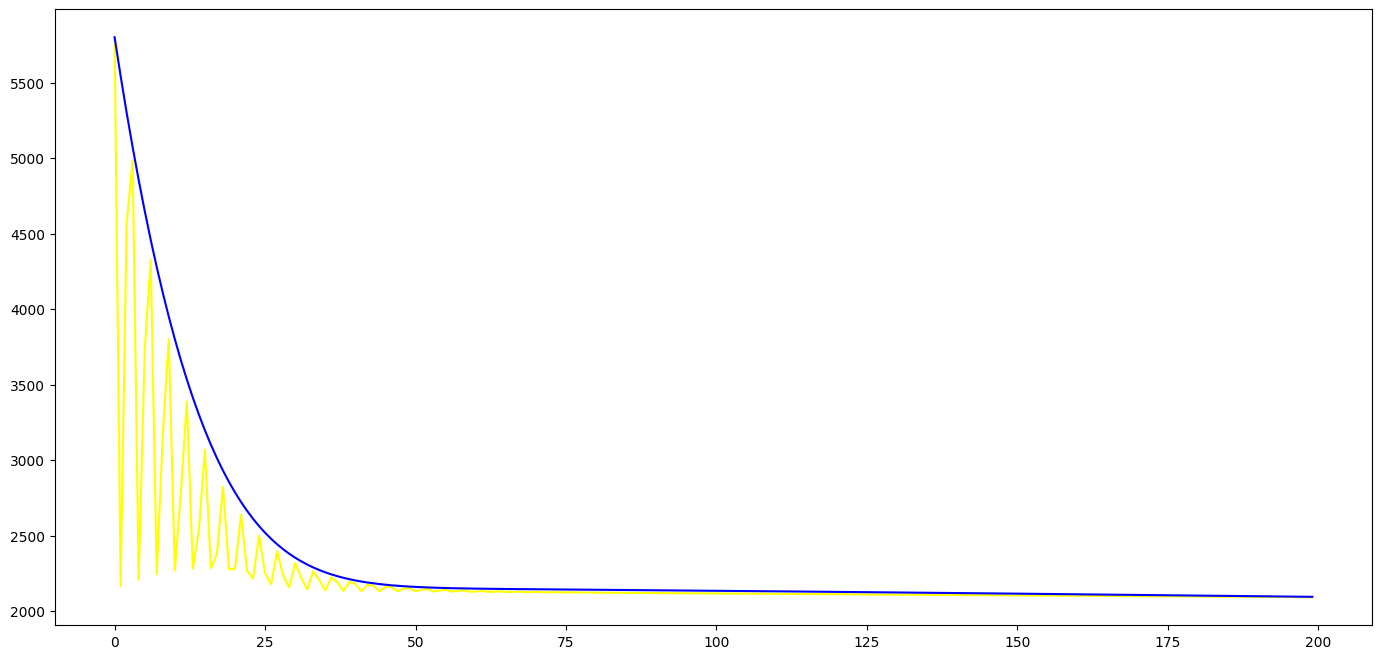

In [123]:
from matplotlib import pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(nb_epoch, loss1, color = 'yellow')
plt.plot(nb_epoch, loss2, color = 'blue')

On voit comment Adam gère indépendemment les deux paramètres pour les faire progresser tous les deux de la même manière, contrairement au SGD w/ momentum